# Step 1: Import Libraries and Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("bankmarketing.csv") 

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Step 2: Basic Info & Missing Values

In [5]:
print("Shape of dataset:", df.shape)

Shape of dataset: (41188, 21)


In [6]:
print("\nInfo about columns:\n")
df.info()


Info about columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf

# Step 3: Statistical Summary & Unique Value Check

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
cat_cols = df.select_dtypes(include='object').columns


In [10]:
for col in cat_cols:
    print(f"\nUnique values in '{col}': {df[col].unique()}")


Unique values in 'job': ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique values in 'marital': ['married' 'single' 'divorced' 'unknown']

Unique values in 'education': ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique values in 'default': ['no' 'unknown' 'yes']

Unique values in 'housing': ['no' 'yes' 'unknown']

Unique values in 'loan': ['no' 'yes' 'unknown']

Unique values in 'contact': ['telephone' 'cellular']

Unique values in 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Unique values in 'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']

Unique values in 'poutcome': ['nonexistent' 'failure' 'success']

Unique values in 'y': ['no' 'yes']


# Step 4: Analyze the Target Variable (y)

In [11]:
print("Target Variable Distribution:\n")
print(df['y'].value_counts())

Target Variable Distribution:

y
no     36548
yes     4640
Name: count, dtype: int64


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

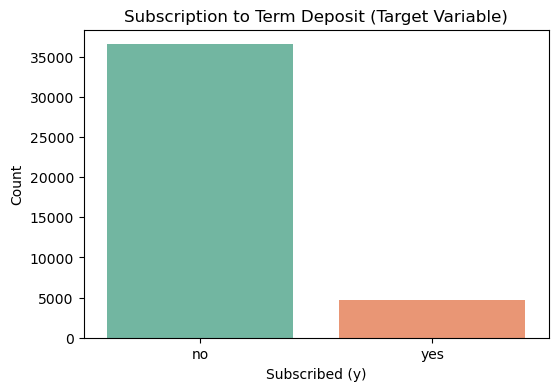

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='y', palette='Set2')
plt.title("Subscription to Term Deposit (Target Variable)")
plt.xlabel("Subscribed (y)")
plt.ylabel("Count")
plt.show()

# Step 5: Univariate Analysis

In [14]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns


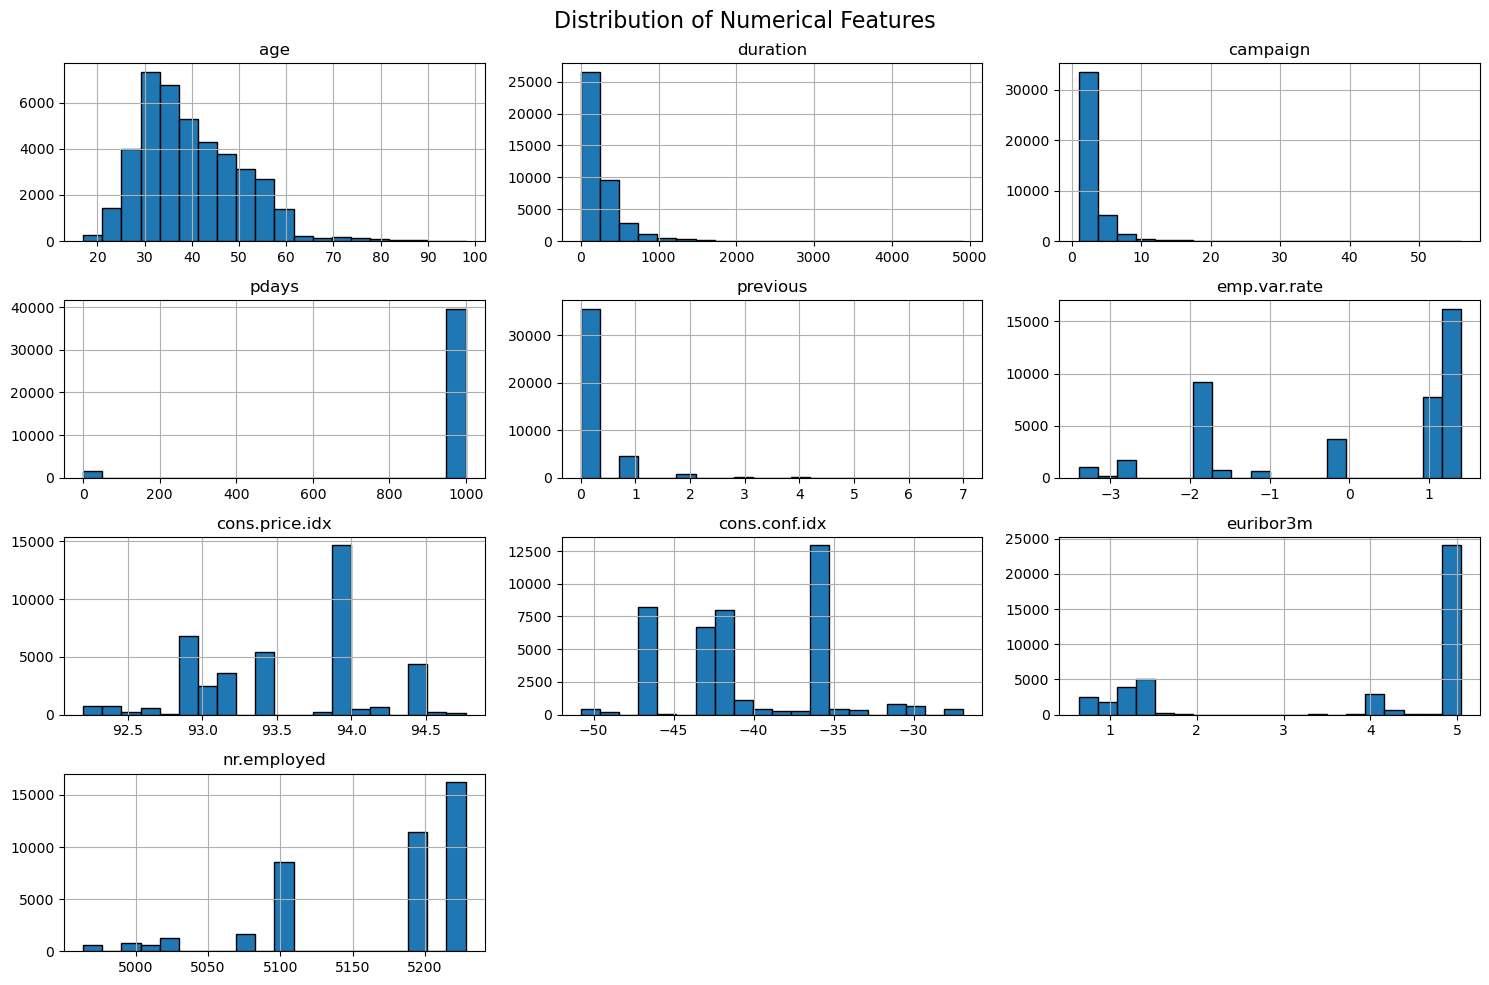

In [15]:
df[num_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

In [16]:
cat_cols = df.select_dtypes(include='object').columns

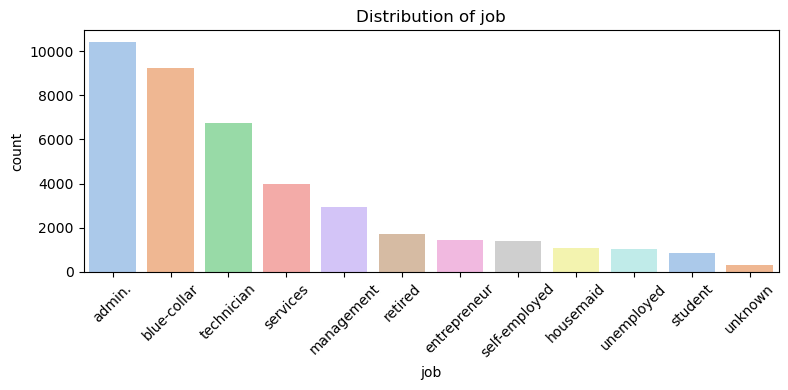

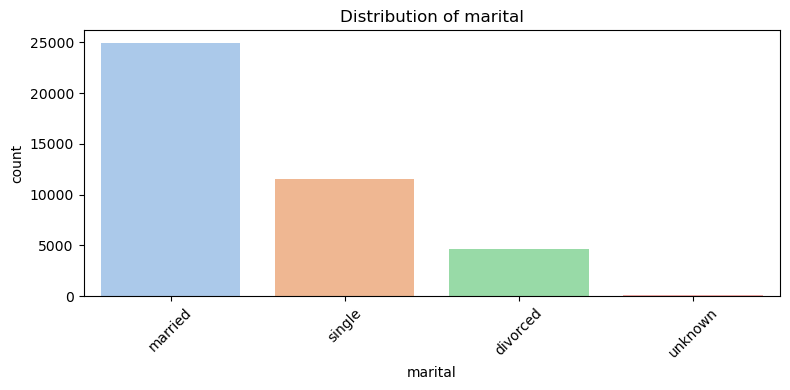

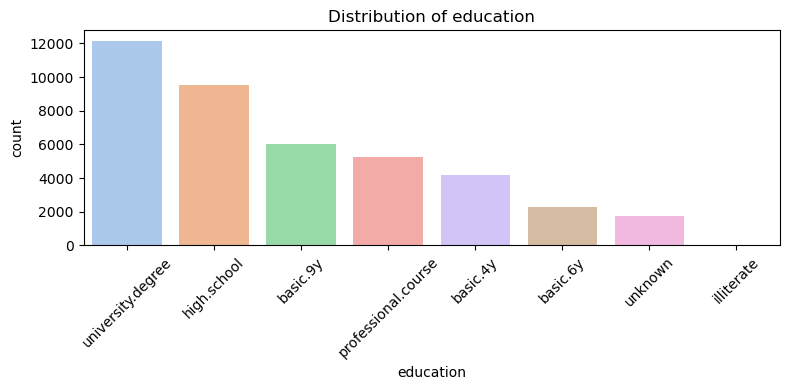

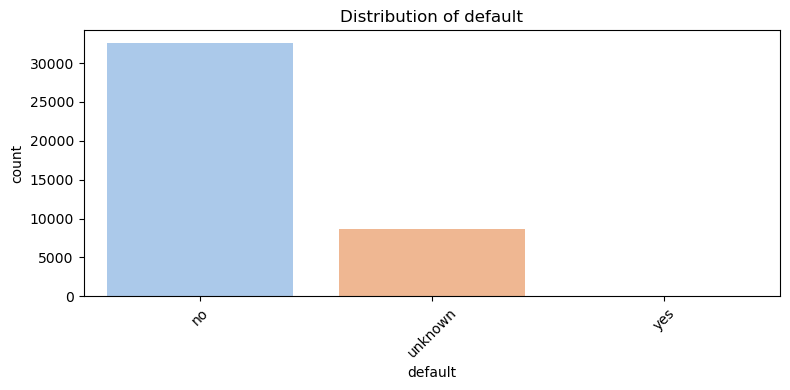

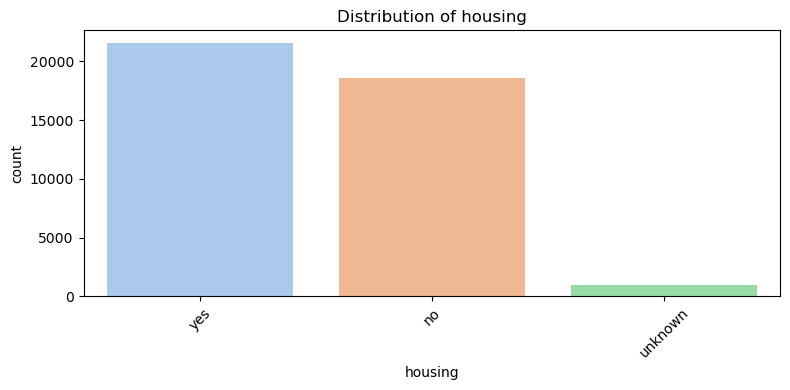

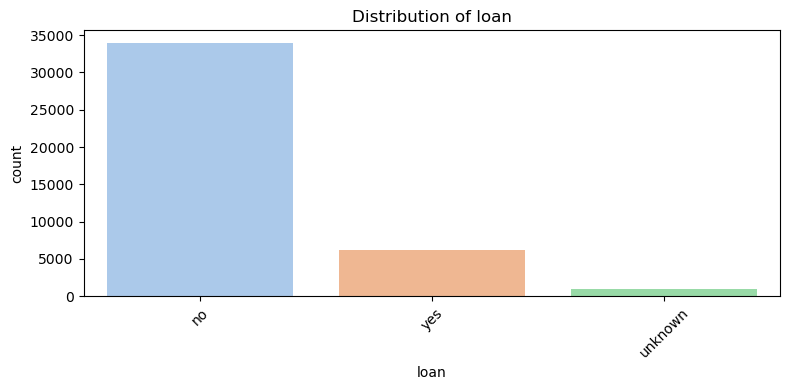

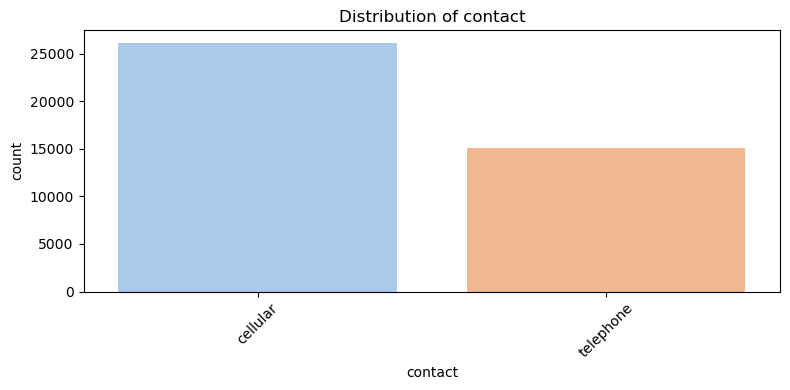

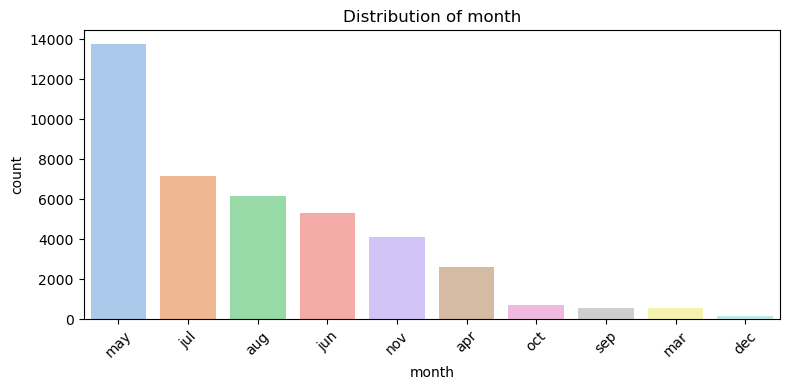

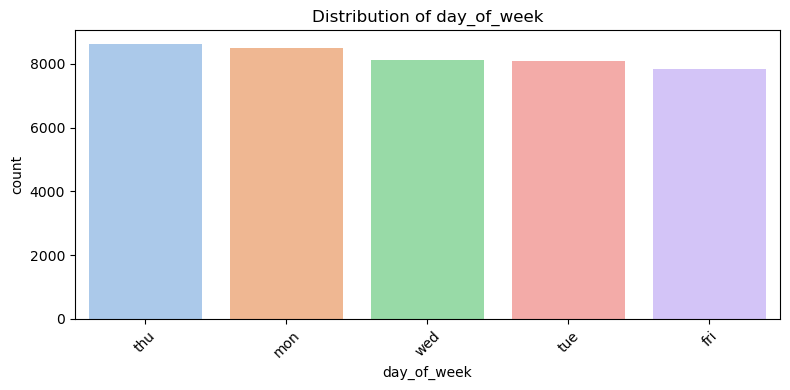

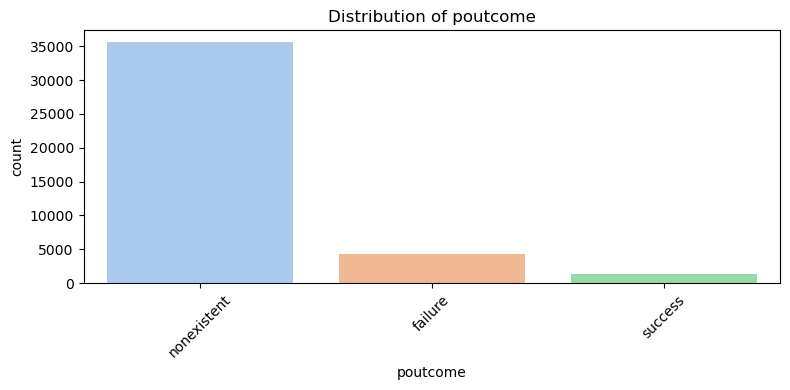

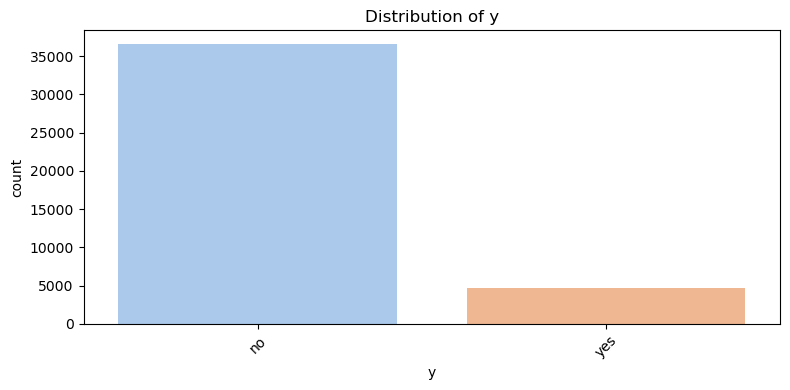

In [17]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 6: Bivariate Analysis — Feature vs Target (y)

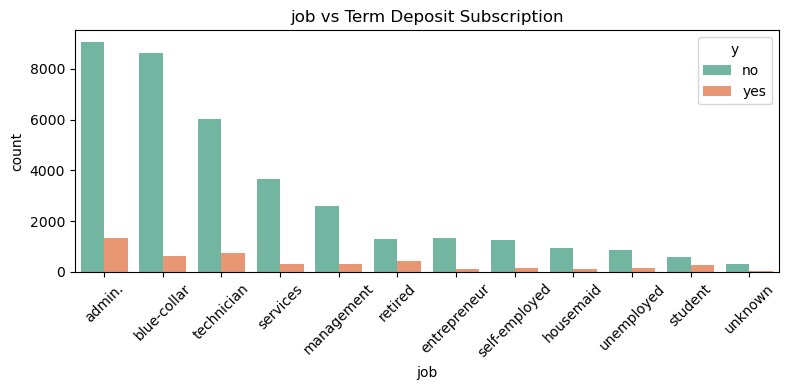

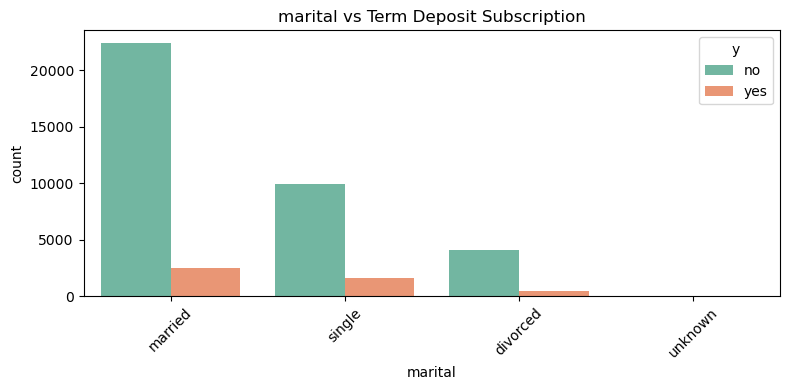

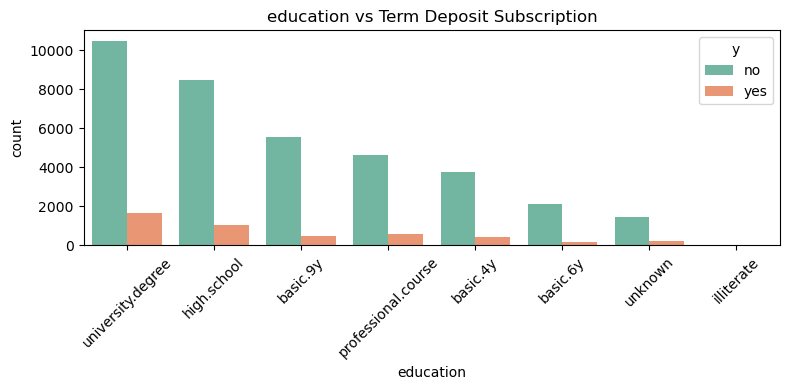

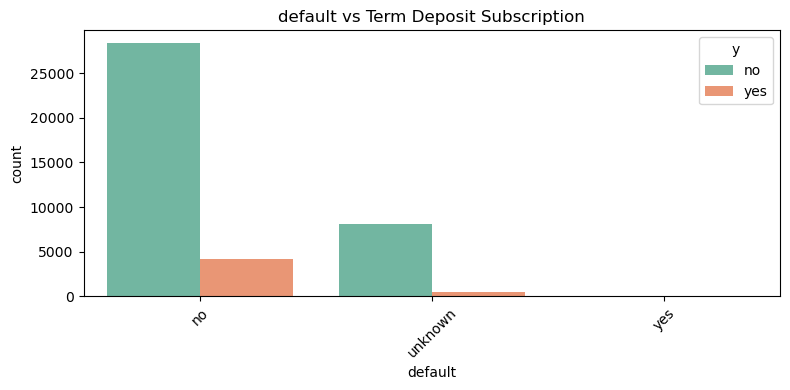

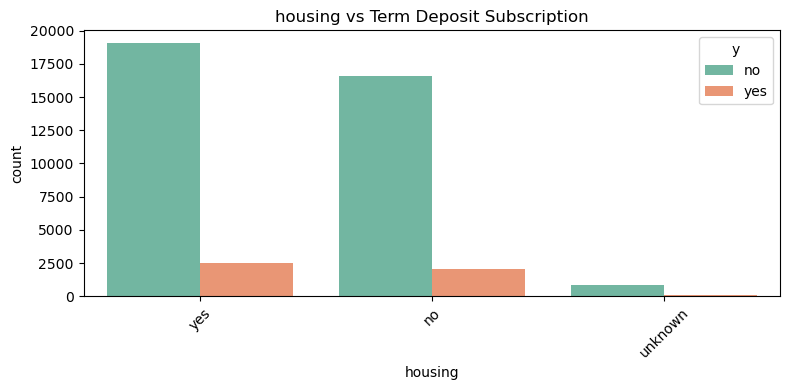

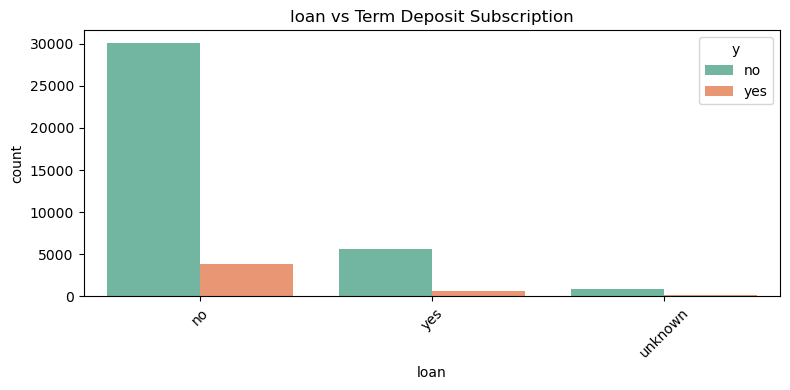

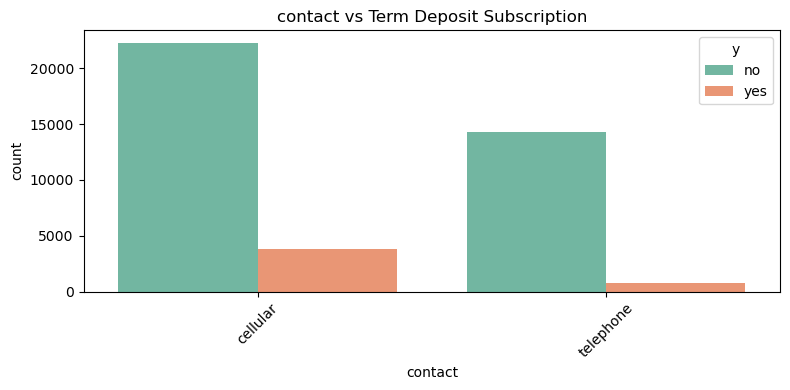

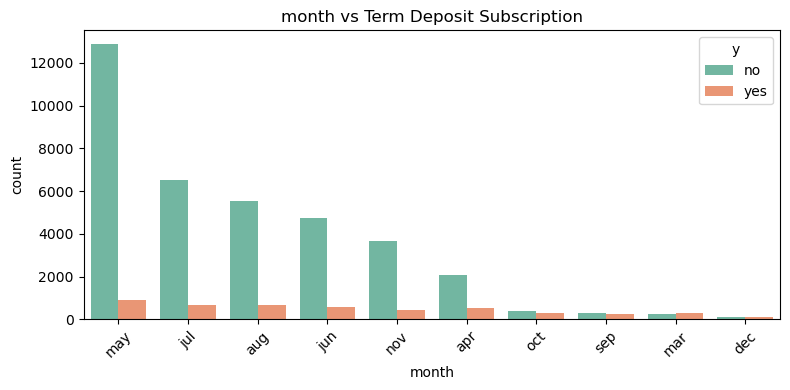

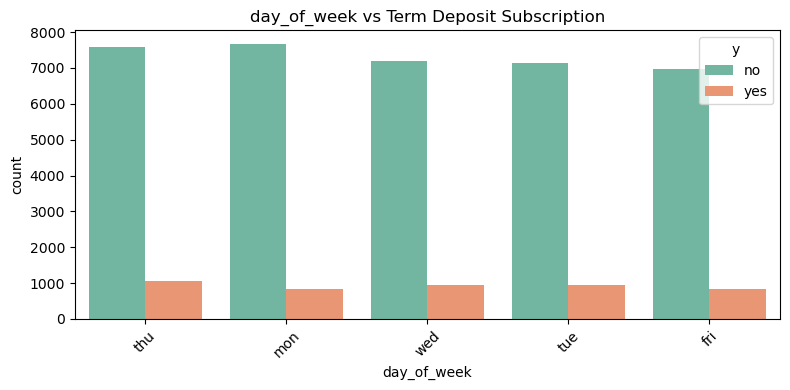

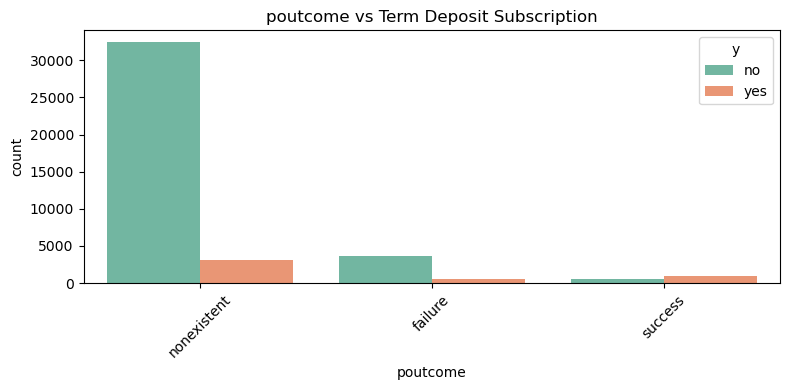

In [18]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    if col != 'y':
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, hue='y', order=df[col].value_counts().index, palette='Set2')
        plt.title(f"{col} vs Term Deposit Subscription")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Correlation Heatmap (Numerical Features)

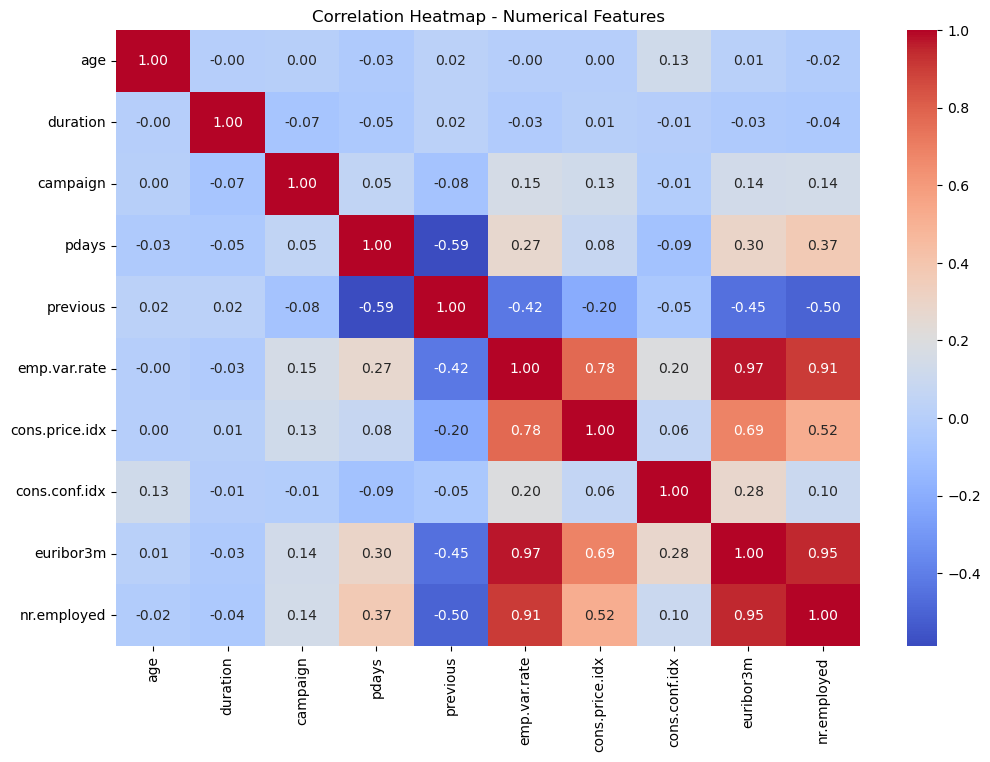

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap - Numerical Features")
plt.show()